# Dilemma, $\epsilon$-greedy

## Libraries

In [76]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import gym

## Environment

In [77]:
# Initialize the FrozenLake environment
environment = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True)

## Exponential

In [78]:
# Initialize the Q-table
num_states = environment.observation_space.n  # 16 states in a 4x4 grid
num_actions = environment.action_space.n # 4 actions (LEFT, DOWN, RIGHT, UP)
qtable = np.zeros((num_states, num_actions))  # Initialize with zeros

In [79]:
# Hyperparameters
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
episodes = 1500  # Total number of episodes
epsilon = 1  # Initial exploration rate

In [80]:
decay = round(np.power(0.001, (1 / episodes)), 3)  # Exponential decay rate

In [81]:
# Training loop
outcome = []  # To record the outcome (success or failure) of each episode
epsilon_total = []  # To track the decay of epsilon

In [82]:
# Function to convert state coordinates to a single number
def state_to_number(state):
    return state[0] * 4 + state[1]

In [83]:
state

(0, {'prob': 1})

C:\Users\saath\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Q-table after training:
[[0.01175531 0.06787616 0.01152116 0.01145861]
 [0.00594075 0.00812624 0.00343669 0.09235879]
 [0.17177462 0.00876597 0.00925586 0.00859688]
 [0.00456271 0.00600941 0.00591765 0.00756096]
 [0.10076128 0.00583668 0.00853146 0.01467329]
 [0.         0.         0.         0.        ]
 [0.34685772 0.00226332 0.00227198 0.0012231 ]
 [0.         0.         0.         0.        ]
 [0.01581882 0.02161113 0.0357129  0.21161611]
 [0.03304907 0.36022529 0.0355417  0.02634609]
 [0.37415801 0.01788652 0.01505747 0.02128272]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.12839949 0.10703594 0.64129146 0.13553927]
 [0.20146384 0.9150811  0.19410808 0.19032437]
 [0.         0.         0.         0.        ]]


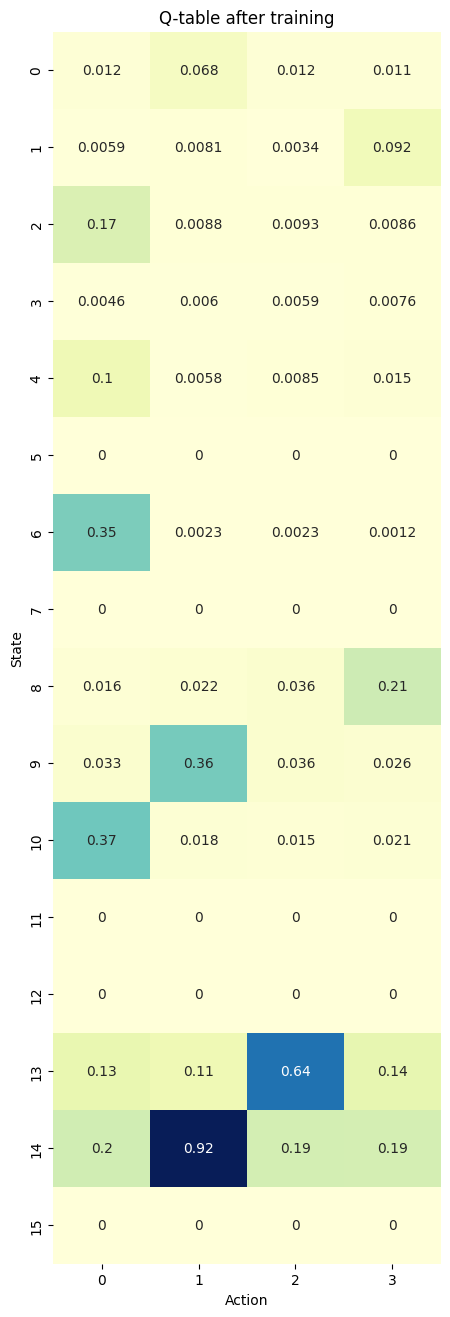

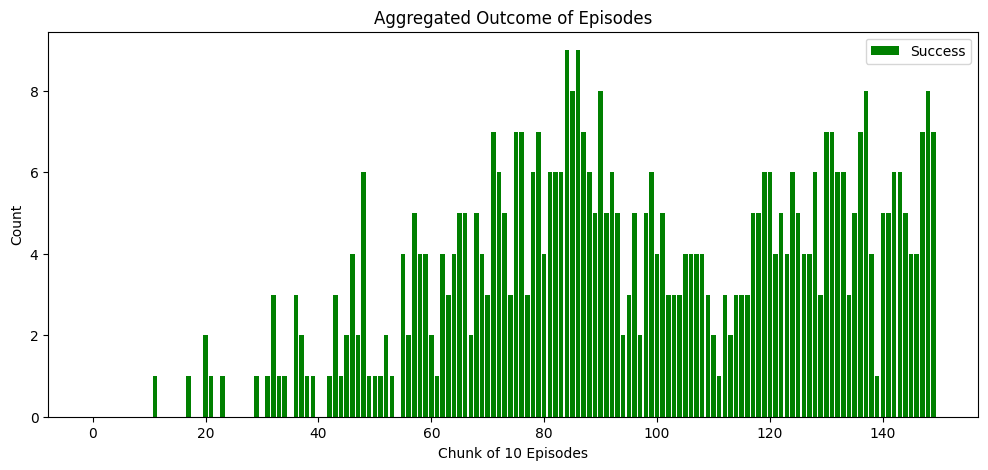

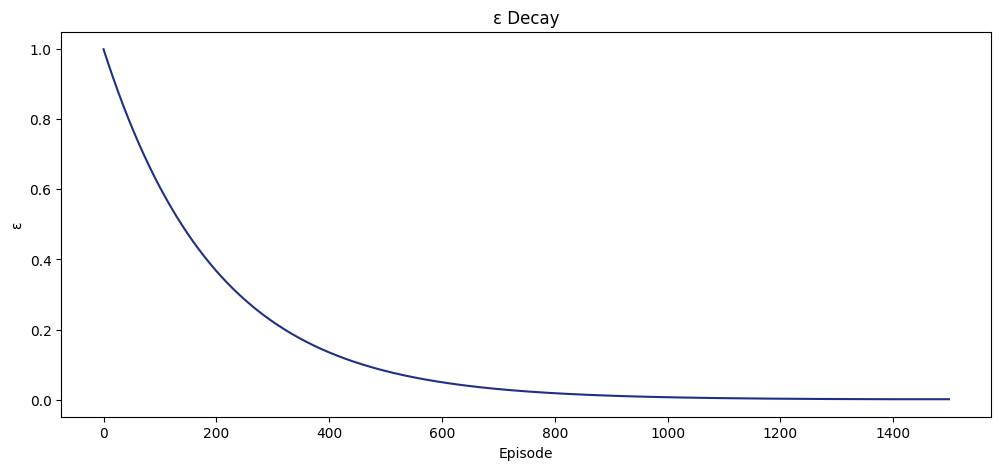

Starting Episode...


TypeError: 'int' object is not subscriptable

In [84]:
for episode in range(episodes):
    state = environment.reset()
    state_number = state[0]
    done = False
    epsilon_total.append(epsilon)
    outcome.append("Failure")

    while not done:
        # Exploration or Exploitation
        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2, 3])  # Exploration: choose a random action
        else:
            action = np.argmax(qtable[state_number])  # Exploitation: choose the best action from Q-table

        # Take the action
        new_state, reward, done, a, b = environment.step(action)
        new_state_number = new_state

        # Q-table update
        qtable[state_number, action] = qtable[state_number, action] + alpha * (
                reward + gamma * np.max(qtable[new_state_number]) - qtable[state_number, action])

        state_number = new_state_number  # Update the state number

        if reward == 1:  # Check for success
            outcome[-1] = "Success"

    # Decay epsilon
    epsilon = max(0.001, epsilon * decay)

# Plotting the results
print('===========================================')
print('Q-table after training:')
print(qtable)

# Draw Plot
# Q-table heatmap
plt.figure(figsize=(5, 16))
sns.heatmap(qtable, cmap="YlGnBu", annot=True, cbar=False)
plt.title("Q-table after training")
plt.xlabel("Action")
plt.ylabel("State")
plt.show()

# Outcome of each episode
# Aggregating outcome data for efficient plotting
chunk_size = 10  # Aggregate every 1000 episodes
chunks = episodes // chunk_size
success_count = [np.sum(np.array(outcome[i*chunk_size:(i+1)*chunk_size]) == "Success") for i in range(chunks)]
failure_count = [chunk_size - success for success in success_count]

# Plotting aggregated outcomes
plt.figure(figsize=(12, 5))
plt.bar(range(chunks), success_count, color="green", label="Success")
# plt.bar(range(chunks), failure_count, bottom=success_count, color="red", label="Failure")
plt.xlabel("Chunk of 10 Episodes")
plt.ylabel("Count")
plt.title("Aggregated Outcome of Episodes")
plt.legend()
plt.show()

# Epsilon decay along episode
plt.figure(figsize=(12, 5))
plt.plot(epsilon_total, color="#1f2f87")
plt.title("ε Decay")
plt.xlabel("Episode")
plt.ylabel("ε")
plt.show()

# Function to print the Frozen Lake grid with the current position of the agent
def print_grid(state, grid):
    grid_with_agent = np.copy(grid)
    grid_with_agent[state] = 'A'  # Mark the agent's current position with 'A'
    print("\n".join(["".join(row) for row in grid_with_agent]))
    print()


# Simulate one episode
state = environment.reset()
done = False
action_list = []  # To store the sequence of actions

print("Starting Episode...")
# print_grid(state, environment.grid)

while not done:
    state_number = state[0]
    # Choose the best action from Q-table (exploitation)
    action = np.argmax(qtable[state_number])
    new_state, reward, done, a, b = environment.step(action)

    # Record the action
    action_list.append(action)

    # Print the updated grid
    # print_grid(new_state, environment.grid)

    # Update the state
    state = new_state

# action_names = {0: "LEFT", 1: "DOWN", 2: "RIGHT", 3: "UP"}
# action_list_named = [action_names[a] for a in action_list]

print(action_list_named)

## Linear

In [85]:
# Hyperparameters
# Hyperparameters
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
episodes = 1500  # Total number of episodes
epsilon = 1  # Initial exploration rate

# Training loop
outcome = []  # To record the outcome (success or failure) of each episode
epsilon_total = []  # To track the decay of epsilon
epsilon_decay = 1/episodes  # Linear Decay
qtable = np.zeros((num_states, num_actions))  # Initialize with zeros

Q-table after training:
[[9.03003469e-02 1.31406984e-02 2.03169495e-02 3.46920326e-02]
 [9.30619443e-03 2.06039592e-03 4.10044629e-03 1.62767180e-02]
 [9.50694965e-03 1.90997444e-02 9.53850435e-03 9.61022959e-03]
 [8.00233557e-03 4.00786008e-03 3.73533601e-03 1.10698718e-02]
 [1.33819406e-01 2.38413032e-02 3.47919865e-02 1.28084743e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.40337683e-03 3.97449169e-03 9.74783642e-02 6.86274008e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.45700657e-03 6.57584056e-02 8.31357628e-02 2.29694234e-01]
 [3.68318299e-02 2.65069091e-01 2.74373409e-02 1.08545932e-03]
 [5.09505154e-01 3.58185013e-02 8.50502905e-03 4.31625827e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.74371628e-02 2.70973020e-02 5.05828104e-01 8.84126387e-02]
 [3.69709234e-01 9.33965141e-01 1.20759636e-01 1.34859376e-01]
 [0.00000000e+00 0.00000000e+00

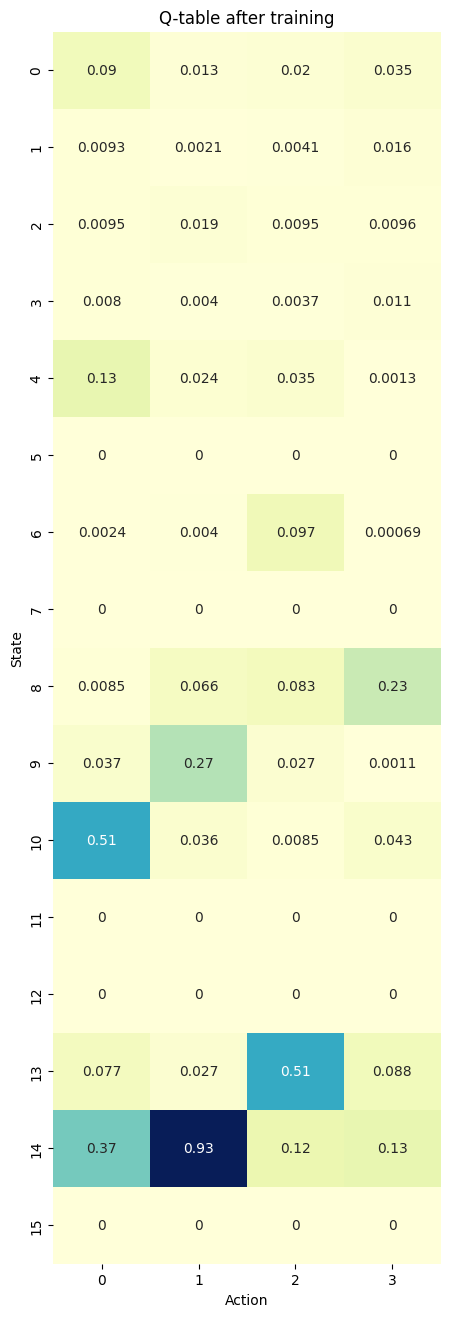

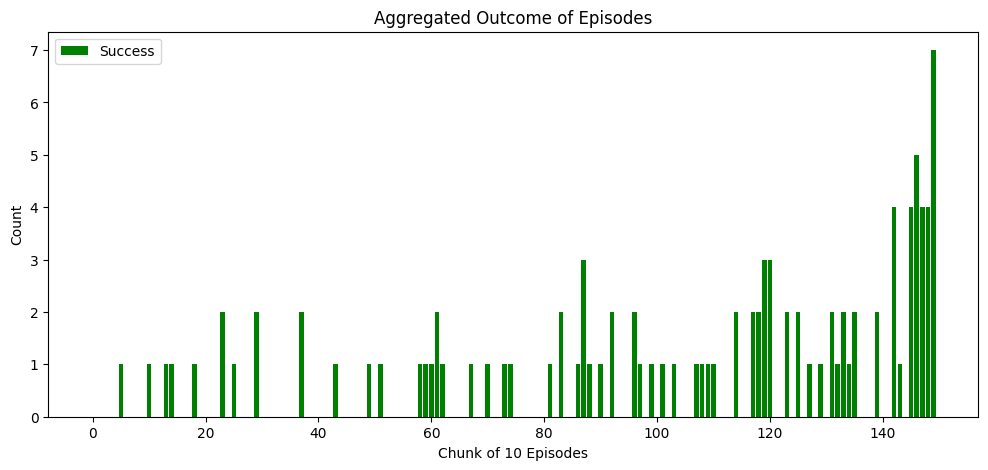

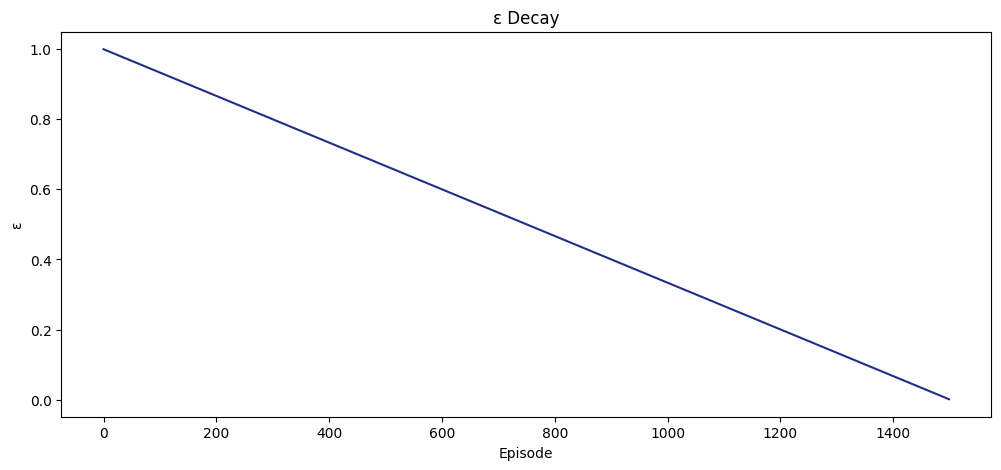

Starting Episode...


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [86]:
for episode in range(episodes):
    state = environment.reset()
    state_number = state[0]
    done = False
    epsilon_total.append(epsilon)
    outcome.append("Failure")

    while not done:
        # Exploration or Exploitation
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice([0, 1, 2, 3])  # Exploration: choose a random action
        else:
            action = np.argmax(qtable[state_number])  # Exploitation: choose the best action from Q-table

        # Take the action
        new_state, reward, done, a, b = environment.step(action)
        new_state_number = new_state

        # Q-table update
        qtable[state_number, action] = qtable[state_number, action] + alpha * (
            reward + gamma * np.max(qtable[new_state_number]) - qtable[state_number, action])

        state_number = new_state_number  # Update the state number

        if reward == 1:  # Check for success
            outcome[-1] = "Success"

    # Decay epsilon
    epsilon = max(0.001, epsilon - epsilon_decay)


# Plotting the results
print('===========================================')
print('Q-table after training:')
print(qtable)

# Draw Plot
# Q-table heatmap
plt.figure(figsize=(5, 16))
sns.heatmap(qtable, cmap="YlGnBu", annot=True, cbar=False)
plt.title("Q-table after training")
plt.xlabel("Action")
plt.ylabel("State")
plt.show()

# Outcome of each episode
# Aggregating outcome data for efficient plotting
chunk_size = 10  # Aggregate every 1000 episodes
chunks = episodes // chunk_size
success_count = [np.sum(np.array(outcome[i*chunk_size:(i+1)*chunk_size]) == "Success") for i in range(chunks)]
failure_count = [chunk_size - success for success in success_count]

# Plotting aggregated outcomes
plt.figure(figsize=(12, 5))
plt.bar(range(chunks), success_count, color="green", label="Success")
# plt.bar(range(chunks), failure_count, bottom=success_count, color="red", label="Failure")
plt.xlabel("Chunk of 10 Episodes")
plt.ylabel("Count")
plt.title("Aggregated Outcome of Episodes")
plt.legend()
plt.show()

# Epsilon decay along episode
plt.figure(figsize=(12, 5))
plt.plot(epsilon_total, color="#1f2f87")
plt.title("ε Decay")
plt.xlabel("Episode")
plt.ylabel("ε")
plt.show()


# Function to print the Frozen Lake grid with the current position of the agent
# def print_grid(state, grid):
#     grid_with_agent = np.copy(grid)
#     grid_with_agent[state] = 'A'  # Mark the agent's current position with 'A'
#     print("\n".join(["".join(row) for row in grid_with_agent]))
#     print()

# Simulate one episode
state = environment.reset()
done = False
action_list = []  # To store the sequence of actions

print("Starting Episode...")
# print_grid(state, environment.grid)

while not done:
    state_number = state
    # Choose the best action from Q-table (exploitation)
    action = np.argmax(qtable[state_number])
    new_state, reward, done, a, b = environment.step(action)

    # Record the action
    action_list.append(action)

    # Print the updated grid
    # print_grid(new_state, environment.grid)

    # Update the state
    state = new_state

action_names = {0: "LEFT", 1: "DOWN", 2: "RIGHT", 3: "UP"}
action_list_named = [action_names[a] for a in action_list]

print(action_list_named)